# Exercício

Dados:
   1. FraAnual: Taxa Anual
   2. Cuslnic: investimento inicial

Objetivo: Criar um modelo de regressão linear para prever qual será o investimento inicial necessário de uma franquia a partir da Taxa Anual cobrado pelo franqueador.

In [49]:
#Importação das bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
#Importação dos dados

base = pd.read_csv('slr12.csv', sep=';')
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [18]:
#Criação das varíaveis X(variavel independente) e Y(variavel dependente) com base nos dados

x = base.iloc[:, 0].values
y = base.iloc[:, 1].values

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850], dtype=int64)

In [19]:
#Analise da correlação entre as variaveis 

correlacao = np.corrcoef(x,y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

<Axes: >

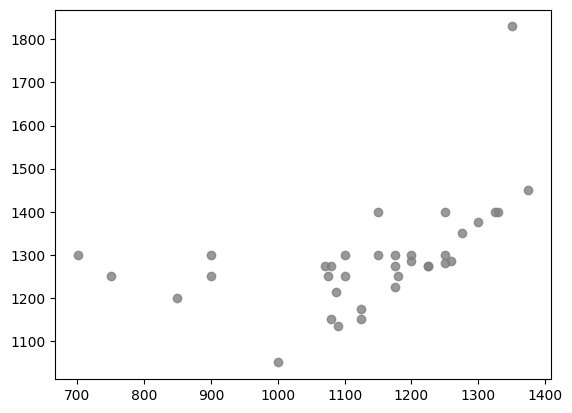

In [80]:
#Crianção de grafico de disperção

sns.regplot(x = x, y = y, x_jitter= 0.3, fit_reg = False, color = 'grey')

In [39]:
""" 
Transformando o X(variavel independente) em uma matriz com 1 coluna e n linhas, 
visto que o metodo fit da função LinearRegression espera uma matriz,
pois pode ter varias colunas (variaveis independentes).
"""

x = x.reshape(-1, 1)

In [40]:
#Criação do modelo utilizando a biblioteca sklearn

modelo = LinearRegression()
modelo.fit(x,y)


LinearRegression()

In [41]:
#Verificando a interseção do modelo

modelo.intercept_

867.6042222620558

In [42]:
#Verificando a angulação do modelo

modelo.coef_

array([0.37315794])

In [53]:
#Score R^2

modelo.score(x,y)


0.2275359181555101

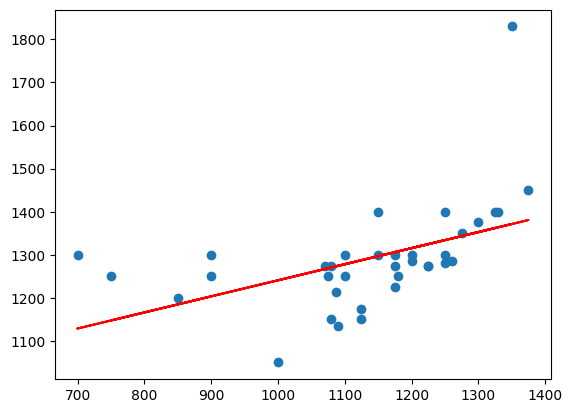

In [56]:
#Grafico do modelo 

plt.scatter(x,y)
plt.plot(x,modelo.predict(x), color = 'red')

# Exercutando Previsões

1) Com uma taxa anual de 1600 reais, eu terei um investimento inicial de quanto?

In [74]:
resultado = modelo.predict([[1600]])

print(f'{resultado[0]:.2f} R$')

1464.66 R$


2. Com uma taxa anual de 4000 reais, eu terei um investimento inicial de quanto?

In [73]:
resultado = modelo.predict([[4000]])

print(f'{resultado[0]:.2f} R$')

2360.24 R$


3. Com uma taxa anual de 200 reais, eu terei um investimento inicial de quanto?

In [75]:
resultado = modelo.predict([[200]])

print(f'{resultado[0]:.2f} R$')

942.24 R$
